# Topic Modelling with Latent Dirichlet Allocation (LDA)

Topic modeling is a type of statistical modeling for discovering the topics that occur in a collection of documents. By doing topic modeling, we build clusters of words rather than clusters of texts.

LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

- psi, the distribution of words for each topic K

- phi, the distribution of topics for each document i

## Tokenize text for LDA
To use ```space.load('en')```, download it using the following:

```python3 -m spacy download en```

In [1]:
import spacy

spacy.load("en_core_web_sm")
from spacy.lang.en import English
parser = English()

def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        # elif token.like_url:
        #     lda_tokens.append('URL')
        # elif token.orth_.startswith('@'):
        #     lda_tokens.append('SCREEN_NAME')
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

## Lemmatization using NLTK WordNet

Using ```WordNetLemmatizer``` to get the root word.

In [2]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('wordnet')

from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma(word):
    return WordNetLemmatizer().lemmatize(word)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ejayb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Getting a list of StopWords 

In [3]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ejayb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Text pre-processing

Following steps are followed for text pre-processing before using LDA:
1. Find the topic sentence in the text by using a custom regex expression
1. Tokenize text using our tokenizer above
1. Remove tokens of length less than 4
1. Remove tokens that are stop words
1. Reduce tokens to their base form using our Lemmatizer above

In [4]:
import regex as re
from nltk.tokenize import sent_tokenize
    
#By HJB
def extract_topic_sentences(title, abstract):
    title = title.lower()
    abstract = abstract.lower()
    sentences = sent_tokenize(abstract)
    topic_indicators = ['we show that','this study shows that','the goal of this study is',
                        'we find','this study finds','results:','we report here','we conclude','we show','this study shows',
                       'study indicates']
    regex_expr = r"""(\.|\A)\s(?P<topic_sentence>[^\.]*("""+"|".join(topic_indicators)+r""")[^\.]*)(\.|\Z)"""
    matches = list(re.finditer(regex_expr,abstract))
    if matches == None or len(matches)==0:
        topic_sentence = sentences[-1]
    else:
        topic_sentence = matches[-1].group('topic_sentence').strip()
    out = title + '. ' + topic_sentence
    return out

print(extract_topic_sentences('A nice title here', 
                              'I desire only to die. There is nothing left for me. Banana.'))
print(extract_topic_sentences('A nice title here', 
                              'I desire only to die. We show that god has no mercy. There is nothing left for me.'))

a nice title here. banana.
a nice title here. we show that god has no mercy


In [5]:
#By HJB
def isNum(s):
    if s[0] == "-":
        s = s[1:]
    return s.replace('.','').isnumeric()
def prepare_text_for_lda(title, abstract):
    text = extract_topic_sentences(title,abstract)
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    #Added by HJB, filter out tokens which are just numbers
    tokens = [token for token in tokens if not(isNum(token))]
    tokens = [(token) for token in tokens]
    return tokens


## Processing COVID metadata

In [6]:
import random
import pandas as pd

text_data = []
covid_dataset = pd.read_csv(r"""C:\Users\ejayb\HealthDataAnalytics\Proj3\Problem2\metadata_April10_2020.csv""",
                             encoding = "ISO-8859-1")
print("Total Articles: ", len(covid_dataset))


Total Articles:  51078


In [7]:
for index, row in covid_dataset.iterrows():
    tokens = prepare_text_for_lda(str(row['title']),str(row['abstract']))
    if random.random() > .995:
        print(tokens)
    text_data.append(tokens)


['annual', 'toronto', 'critical', 'medicine', 'symposium', 'octoberâ\x80\x931', 'november', 'toronto', 'ontario', 'canada']
['genetic', 'immunization', 'hantavirus', 'vaccine', 'combining', 'expression', 'glycoprotein', 'fused', 'interleukin-2', 'results', 'suggest', 'based', 'induce', 'humoral', 'cellular', 'immune', 'response', 'specific', 'candidate', 'vaccine', 'infection']
['unstructured', 'event', 'based', 'reports', 'global', 'infectious', 'disease', 'surveillance', 'development', 'would', 'establish', 'event', 'based', 'monitoring', 'invaluable', 'public', 'health', 'resource', 'provides', 'critical', 'context', 'alternative', 'traditional', 'indicator', 'based', 'outbreak', 'reporting']
['health', 'parasitology']
['extraction', 'characterization', 'rhesus', 'macaque', 'receptor', 'î²-chain', 'genes', 'primary', 'description', 'rhesus', 'macaque', 'genes', 'provide', 'standardized', 'nomenclature', 'enable', 'better', 'characterization', 'usage', 'studies', 'utilize', 'species'

['dis)order', 'regulation', 'electronic', 'supplementary', 'material', 'online', 'version', 'article', 'doi:10.1186', 's12964', 'contains', 'supplementary', 'material', 'available', 'authorized', 'users']
['identification', 'mirnomes', 'reveals', 'mir-30d', 'potential', 'therapeutic', 'target', 'viral', 'infection', 'current', 'study', 'reveals', 'mirnomes', 'prrsv', 'infected', 'lungs', 'indicates', 'mir-30d', 'potential', 'therapeutic', 'agent', 'controlling', 'prrsv', 'infection']
['evolutionary', 'dynamics', 'potential', 'recombination', 'positive', 'selection', 'transmission', 'together', 'results', 'suggest', 'potential', 'recombination', 'events', 'might', 'happened', 'frequently', 'covâ\x80\x99s', 'evolutionary', 'history', 'positive', 'selection', 'sites', 'covâ\x80\x99s', 'protein', 'might', 'enable', 'infect', 'human']
['respiratory', 'viruses', 'children', 'cystic', 'fibrosis', 'viral', 'detection', 'clinical', 'findings', 'conclusions', 'relatively', 'frequency', 'rhinovir

['pneumonia', 'experience', 'patients', 'severe', 'clinical', 'course', 'novel', 'swine', 'origin', 'influenza', 'virus', 'results', 'patients', 'radiological', 'signs', 'pulmonary', 'involvement']
['nucleocapsid', 'protein', 'antagonizes', 'response', 'targeting', 'initial', 'induction', 'pathway', 'terminal', 'region', 'critical', 'antagonism', 'results', 'contribute', 'understanding', 'pathogenesis']
['middle', 'respiratory', 'syndrome', 'coronavirus', 'encoded', 'orf8b', 'strongly', 'antagonizes', 'promoter', 'activation', 'implication', 'vaccine', 'design', 'novel', 'findings', 'facilitate', 'elucidation', 'mechanisms', 'virus', 'encoded', 'evasion', 'strategies', 'helping', 'design', 'rationale', 'antiviral', 'countermeasures', 'deadly', 'infection']
['response', 'gould', 'vincelli']
['therapeutics', 'potential', 'class', 'pharmaceutical', 'drugs', 'advances', 'commencement', 'multiple', 'clinical', 'trials', 'therapeutic', 'candidates', 'transformation', 'modern', 'medicine', 'r

['influenza', 'virus', 'protein', 'inhibits', 'epithelial', 'sodium', 'channels', 'increasing', 'reactive', 'oxygen', 'species', 'expression', 'transmembrane', 'influenza', 'protein', 'decreases', 'membrane', 'levels', 'amiloride', 'sensitive', 'currents', 'xenopus', 'oocytes', 'injected', 'human', 'î³-enacs', 'human', 'airway', 'cells', 'express', 'native', 'enacs']
['efficacy', 'rhesus', 'theta', 'defensin-1', 'experimental', 'models', 'pseudomonas', 'aeruginosa', 'infection', 'inflammation', 'collectively', 'studies', 'support', 'development', 'rtd-1', 'treatment', 'airway', 'disease']
['integrating', 'micrornas', 'system', 'biology', 'approach', 'acute', 'injury', 'given', 'particularly', 'recognized', 'regulation', 'immune', 'inflammatory', 'responses', 'mirnas', 'serve', 'novel', 'therapeutic', 'targets', 'biomarkers', 'facilitating', 'realization', 'personalized', 'medicine', 'individuals', 'acute', 'inflammatory', 'disease']
['epidemiology', 'clinical', 'presentations', 'human'

['expression', 'systems']
['vitro', 'study', 'effect', 'probiotic', 'bacterium', 'lactobacillus', 'rhamnosus', 'herpes', 'simplex', 'virus', 'seems', 'receptor', 'occupation', 'macrophage', 'sites', 'decreases', 'hsv-1', 'infectivity', 'studied', 'bacteria']
['lignes', 'directrices', 'quant', 'prise', 'charge', 'patientes', 'obstã', 'trique', 'lesquelles', 'sence', 'syndrome', 'respiratoire', 'vã¨re', 'soupã§onnã', 'probable', 'nouveau', 'issus', 'patientes', 'autoritã', 'sanitaires', 'gionales', 'conjointement', 'personnel', 'hospitalier', 'devraient', 'envisager', 'signation', 'dâ\x80\x99ã', 'tablissements', 'dâ\x80\x99unitã', 'soins', 'santã', 'particuliã¨res', 'compris', 'centres', 'soins', 'primaires', 'secondaires', 'tertiaires', 'concerne', 'lâ\x80\x99offre', 'soins', 'patients', 'atteints', 'maladies', 'semblables']
['vertical', 'transmission', 'severe', 'acute', 'respiratory', 'syndrome', 'coronavirus', 'china', 'infant', 'negative', 'severe', 'acute', 'respiratory', 'coronavi

['cov-2', 'vaccination', 'strategy', 'focused', 'population', 'scale', 'immunity', 'vaccination', 'strategy', 'specifically', 'targets', 'unique', 'vulnerabilities', 'cov-2', 'engage', 'robust', 'adaptive', 'immune', 'response', 'majority', 'human', 'population']
['population', 'level', 'covid-19', 'mortality', 'elderly', 'individuals', 'overall', 'elderly', 'individuals', 'without', 'underlying', 'diseases', 'pandemic', 'epicenters', 'results', 'individuals', 'account', 'covid-19', 'deaths', 'european', 'epicenters', 'approach', 'three', 'hotbed', 'locations']
['potentially', 'repurposing', 'adamantanes', 'covid-19']
['dexamethasone', 'treatment', 'acute', 'respiratory', 'distress', 'syndrome', 'multicentre', 'randomised', 'controlled', 'trial', 'aimed', 'assess', 'effects', 'dexamethasone', 'might', 'change', 'pulmonary', 'systemic', 'inflammation', 'result', 'decrease', 'duration', 'mechanical', 'ventilation', 'mortality']
['organization', 'endoplasmic', 'reticulum', 'export', 'comp

['directions', 'disaster', 'nursing', 'education', 'united', 'states', 'addresses', 'incorporate', 'casualty', 'disaster', 'management', 'skills', 'undergraduate', 'curricula', 'continuing', 'nurse', 'education', 'advanced', 'degree', 'programs', 'nurses', 'united', 'states']
['ribosomal', 'frameshifting', 'jumping', 'readthrough', 'several', 'bizarre', 'examples', 'ribosome', 'jumping', 'multiple', 'codon', 'readthrough', 'continue', 'perplex', 'investigators', 'field']
['elevated', 'serum', 'levels', 'cxcl9', 'autoimmune', 'retinopathy', 'patients', 'study', 'provides', 'support', 'activated', 'inflammatory', 'process', 'identifies', 'possible', 'mechanisms', 'drive', 'autoimmunity', 'disease']
['candidate', 'associated', 'coronavirus', 'vaccine', 'elicits', 'broad', 'immunity', 'monkeys']
['antimicrobial', 'treatment', 'community', 'acquired', 'pneumonia', 'article', 'provides', 'review', 'recent', 'studies', 'guidelines', 'addressing', 'antimicrobial', 'therapy', 'hospitalized', 'p

['â¿quã', 'papel', 'desempeã±a', 'atenciã³n', 'primaria', 'abordaje', 'control', 'nuevas', 'enfermedades', 'gripe', 'aviar', 'sã\xadndrome', 'respiratorio', 'agudo', 'grave', 'bioterrorismo', 'otras']
['molecular', 'diagnostic', 'clinical', 'virology', 'finally', 'introduction', 'universal', 'internal', 'control', 'throughout', 'whole', 'procedure', 'accuracy', 'results', 'generated', 'warranted']
['intraviral', 'interactome', 'chikungunya', 'virus', 'reveals', 'oligomerization', 'palmitoylation', 'structural', 'protein', 'construction', 'intraviral', 'interactome', 'chikv', 'provides', 'basis', 'studying', 'function', 'chikv', 'proteins']
['cardiovascular', 'disease', 'covid-19', 'given', 'enormous', 'burden', 'posed', 'illness', 'significant', 'adverse', 'prognostic', 'impact', 'cardiac', 'involvement', 'research', 'required', 'understand', 'incidence', 'mechanisms', 'clinical', 'presentation', 'outcomes', 'various', 'manifestations', 'covid-19', 'patients']
['establishment', 'stable

## Creating BOW with Dictionary

Doc2bow: Convert document (a list of words) into the bag-of-words format = list of (token_id, token_count) 2-tuples

In [8]:
from gensim import corpora
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
print(corpus[0])
print("-----")
print(corpus[1])
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

c:\python38\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1)]
-----
[(15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1)]


## Training LDA model

In [9]:
import gensim
NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15, random_state=42)
ldamodel.save('model5.gensim')


## Compute Model Perplexity and Coherence Score

In [10]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Perplexity
print('\nPerplexity: ', ldamodel.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=ldamodel, texts=text_data, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.212608018707288

Coherence Score:  0.449228425387832


## Finding Model with Optimal K - Number of Topics

In [11]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    perplexity_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15, random_state=42)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        perplexity = model.log_perplexity(corpus)

        perplexity_values.append(perplexity)
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values, perplexity_values

In [12]:
# Can take a long time to run.
model_list, coherence_values, perplexity_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=text_data, start=2, limit=40, step=2)

## Coherence

Coherence measures the relative distance between words within a topic.

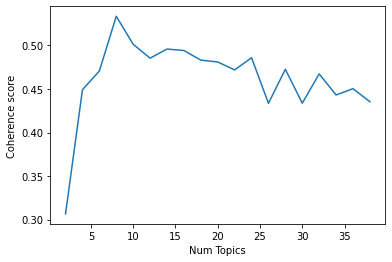

In [13]:
from matplotlib import pyplot as plt

# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")

plt.show()

## Perplexity

Not Often used to pick LDA model. As per https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

"However, recent studies have shown that predictive likelihood (or equivalently, perplexity) and human judgment are often not correlated, and even sometimes slightly anti-correlated."

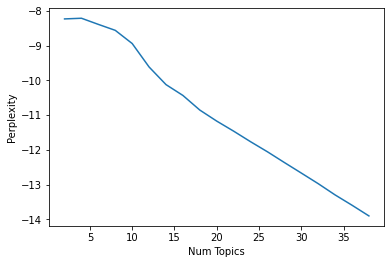

In [14]:
# Show graph
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, perplexity_values)
plt.xlabel("Num Topics")
plt.ylabel("Perplexity")

plt.show()

## Top words in each Topic

In [15]:
topics = ldamodel.print_topics(num_words=10)
for topic in topics:
    print(topic)
    print('----------------------')

(0, '0.031*"respiratory" + 0.016*"virus" + 0.014*"coronavirus" + 0.014*"infection" + 0.013*"acute" + 0.013*"detection" + 0.013*"syndrome" + 0.013*"patients" + 0.011*"infections" + 0.010*"severe"')
----------------------
(1, '0.022*"health" + 0.014*"covid-19" + 0.009*"control" + 0.008*"disease" + 0.008*"outbreak" + 0.008*"public" + 0.008*"china" + 0.007*"transmission" + 0.006*"epidemic" + 0.006*"coronavirus"')
----------------------
(2, '0.026*"virus" + 0.015*"protein" + 0.011*"cells" + 0.010*"coronavirus" + 0.010*"infection" + 0.010*"viral" + 0.007*"results" + 0.007*"replication" + 0.006*"immune" + 0.006*"human"')
----------------------
(3, '0.013*"review" + 0.012*"diseases" + 0.011*"treatment" + 0.011*"disease" + 0.010*"development" + 0.008*"infectious" + 0.008*"clinical" + 0.007*"research" + 0.007*"potential" + 0.007*"emerging"')
----------------------


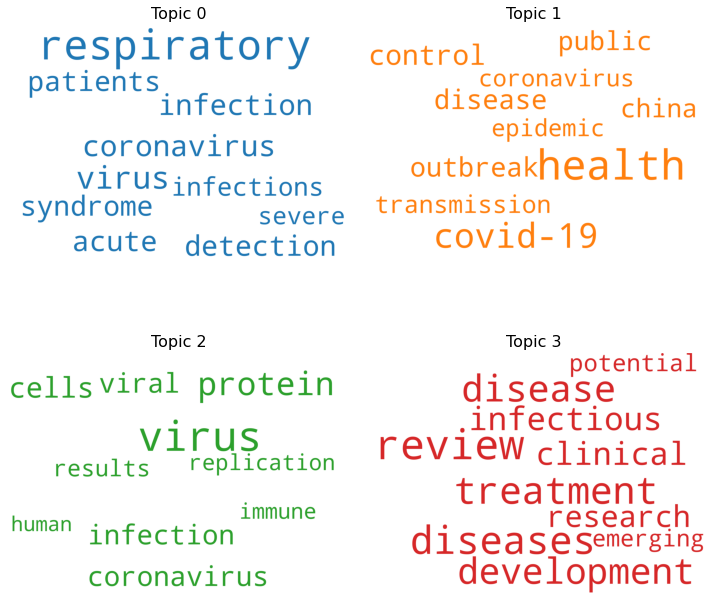

In [17]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

## Testing on new document

In [22]:
new_doc = 'Increase in efficacy of cancer radiotherapy by combination with whole-body low dose irradiation. Banana'
new_doc = prepare_text_for_lda('bjkb',new_doc)
new_doc_bow = dictionary.doc2bow(new_doc)
print(new_doc_bow)
print(ldamodel.get_document_topics(new_doc_bow))

[(26720, 1)]
[(0, 0.22106744), (1, 0.3396059), (2, 0.21796188), (3, 0.22136483)]


## Creating Visualization for Topics

In [30]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')
print("is this getting run?")
import pyLDAvis.gensim_models
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)
pyLDAvis.save_html(lda_display, 'lda.html')

loading Dictionary object from dictionary.gensim
Dictionary lifecycle event {'fname': 'dictionary.gensim', 'datetime': '2021-04-20T18:04:29.371489', 'gensim': '4.0.1', 'python': '3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}


c:\python38\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


loading LdaModel object from model5.gensim
loading expElogbeta from model5.gensim.expElogbeta.npy with mmap=None
setting ignored attribute id2word to None
setting ignored attribute dispatcher to None
setting ignored attribute state to None
LdaModel lifecycle event {'fname': 'model5.gensim', 'datetime': '2021-04-20T18:04:29.832619', 'gensim': '4.0.1', 'python': '3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}
loading LdaState object from model5.gensim.state
LdaState lifecycle event {'fname': 'model5.gensim.state', 'datetime': '2021-04-20T18:04:29.837219', 'gensim': '4.0.1', 'python': '3.8.3 (tags/v3.8.3:6f8c832, May 13 2020, 22:37:02) [MSC v.1924 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.19041-SP0', 'event': 'loaded'}
is this getting run?
NumExpr defaulting to 4 threads.


In [26]:
import pip
pip.main(['install', '--upgrade', 'pyLDAvis'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached funcy-1.15-py2.py3-none-any.whl (32 kB)
  Using cached numexpr-2.7.3-cp38-cp38-win_amd64.whl (93 kB)


0